In [1]:
import pandas as pd
from sklearn.preprocessing import PolynomialFeatures

In [2]:
df = pd.read_csv('Diabetes.csv')
df.head()

,Pragnency,Glucose,Blod Pressure,Skin Thikness,Insulin,BMI,DFP,Age,Diabetes
0,1,85,66,29,0,26.6,0.351,31,0
1,8,183,64,0,0,23.3,0.672,32,1
2,1,89,66,23,94,28.1,0.167,21,0
3,0,137,40,35,168,43.1,2.288,33,1
4,5,116,74,0,0,25.6,0.201,30,0


In [3]:
x = df[['Glucose', 'Age']]
y = df['Diabetes']

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y , test_size = 0.2)

In [6]:
from sklearn.preprocessing import StandardScaler

In [8]:
sl = StandardScaler()
xtrain_s = sl.fit_transform(xtrain)

In [9]:
xtrain_df = pd.DataFrame(xtrain_s, )
print(xtrain_df)

            0         1
0   -0.668826 -0.617816
1   -0.576026 -0.532614
2   -0.359493  0.830611
3    1.774906  0.660208
4   -0.576026  0.745410
..        ...       ...
608 -0.730692 -0.277009
609 -0.019226 -0.617816
610 -0.668826 -0.873420
611  1.929573  0.234200
612  1.713040  2.108635

[613 rows x 2 columns]


In [10]:
from sklearn.neighbors import KNeighborsClassifier

In [11]:
#Model fitting
knn = KNeighborsClassifier()
knn.fit(xtrain_s, ytrain)

,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [12]:
# Prediction
import numpy as np
xnew = np.array([[200,40]])


xnew_s = sl.transform(xnew)
print(xnew_s)
knn.predict(xnew_s)


[[2.45543951 0.57500637]]


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([1])

In [13]:
xtest_s = sl.transform(xtest)

In [14]:
ypred = knn.predict(xtest_s)
ypred

array([0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0])

In [15]:
from sklearn.metrics import accuracy_score

In [16]:
acc = accuracy_score(ypred, ytest)
print(f'{acc:.2%}')


69.48%


In [17]:
from sklearn.svm import SVC

In [18]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

In [19]:
df = pd.read_csv('linear_separable.csv')
df.describe()
x = df[['F1', 'F2']]
y = df['class']

In [20]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size = 0.2)

In [21]:
sl = StandardScaler()
xtrain_s = sl.fit_transform(xtrain)

In [22]:
# Model fitting
svm_model = SVC(kernel= 'linear')
svm_model.fit(xtrain_s,ytrain)

,C,1.0
,kernel,'linear'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [23]:
xtest_s = sl.transform(xtest)

In [24]:
ypred = svm_model.predict(xtest_s)

In [25]:
from sklearn.metrics import accuracy_score

In [26]:
acc = accuracy_score(ytest, ypred)
print(f'{acc:.2%}')

100.00%


In [27]:
import matplotlib.pyplot as plt


In [28]:
pip install mlxtend


[notice] A new release of pip is available: 25.0.1 -> 25.2
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [29]:
from mlxtend.plotting import plot_decision_regions
import numpy as np

<Axes: >

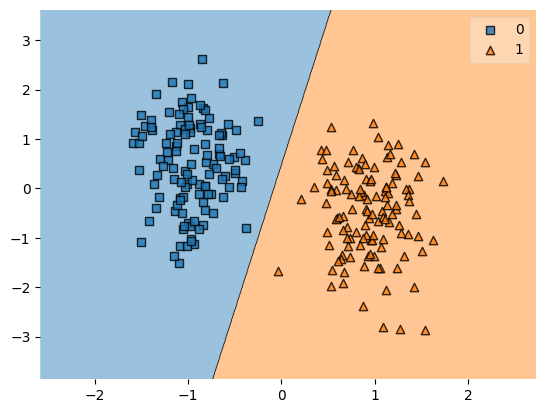

In [30]:
plot_decision_regions(clf = svm_model, X = xtrain_s , y = np.array(ytrain))

In [31]:
###################################################

In [32]:
dfn = pd.read_csv('linear_unseparable.csv')
dfn.head()

,F1,F2,class
0,-0.923460,0.378520,0
1,-0.683349,-0.430303,1
2,-0.415308,-0.677303,1
3,-0.808328,-0.000052,1
4,0.550783,0.823145,0


In [33]:
x = dfn[['F1', 'F2']]
y = dfn['class']

In [34]:
xtrain, xtest, ytrain, ytest = train_test_split(x , y, test_size = 0.2)

In [35]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression()
log_model.fit(xtrain, ytrain)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [36]:
ypred = log_model.predict(xtest)

In [37]:
acc = accuracy_score(ytest, ypred)
print(f'{acc:.2%}')

48.33%


In [38]:
from mlxtend.plotting import plot_decision_regions

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


<Axes: >

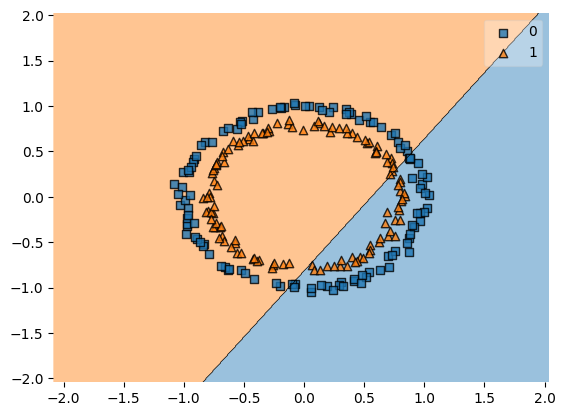

In [39]:
plot_decision_regions(clf = log_model, X = np.array(xtrain), y = np.array(ytrain))

In [40]:
dfn = pd.read_csv('linear_unseparable.csv')
dfn.head()

,F1,F2,class
0,-0.923460,0.378520,0
1,-0.683349,-0.430303,1
2,-0.415308,-0.677303,1
3,-0.808328,-0.000052,1
4,0.550783,0.823145,0


In [41]:
x = dfn[['F1', 'F2']]
y = dfn['class']

In [42]:
xtrain, xtest, ytrain, ytest = train_test_split(x , y, test_size = 0.2)

In [43]:
sl = StandardScaler()
xtrain_s  = sl.fit_transform(xtrain)

In [44]:
# SVM model
svm_model = SVC(kernel = 'rbf') ## kernel : linear , logistic, rbf ,
svm_model.fit(xtrain_s, ytrain)

,C,1.0
,kernel,'rbf'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [45]:
xtest_s = sl.transform(xtest)

In [46]:
ypred = svm_model.predict(xtest_s)


In [47]:
acc = accuracy_score(ytest, ypred)
print(f'{acc:.2%}')

100.00%


<Axes: >

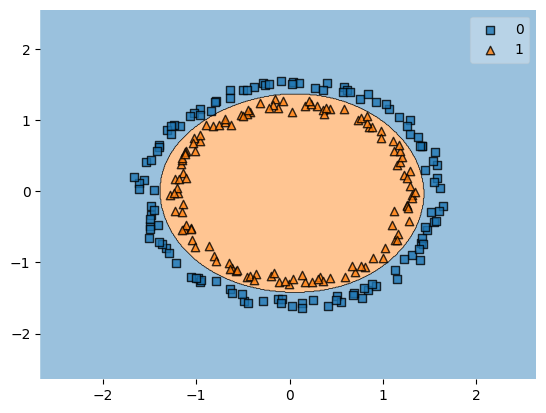

In [48]:
plot_decision_regions(clf = svm_model, X = xtrain_s, y = np.array(ytrain))

In [49]:
# Decision Tree

In [50]:
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [51]:
dataset_names = sns.get_dataset_names()
print(dataset_names)

['anagrams', 'anscombe', 'attention', 'brain_networks', 'car_crashes', 'diamonds', 'dots', 'dowjones', 'exercise', 'flights', 'fmri', 'geyser', 'glue', 'healthexp', 'iris', 'mpg', 'penguins', 'planets', 'seaice', 'taxis', 'tips', 'titanic']


In [52]:
# .Load_dataset()
df_iris = sns.load_dataset('iris')
df_iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [53]:
# X , y
x = df_iris.drop('species', axis = 1)
y = df_iris['species']

In [54]:
# Train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.2)

In [55]:
tree = DecisionTreeClassifier()
tree.fit(xtrain, ytrain)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [56]:
ans = tree.predict([[5,3,1.5,0.2]])
print(ans)

['setosa']


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [57]:
from sklearn.tree import plot_tree

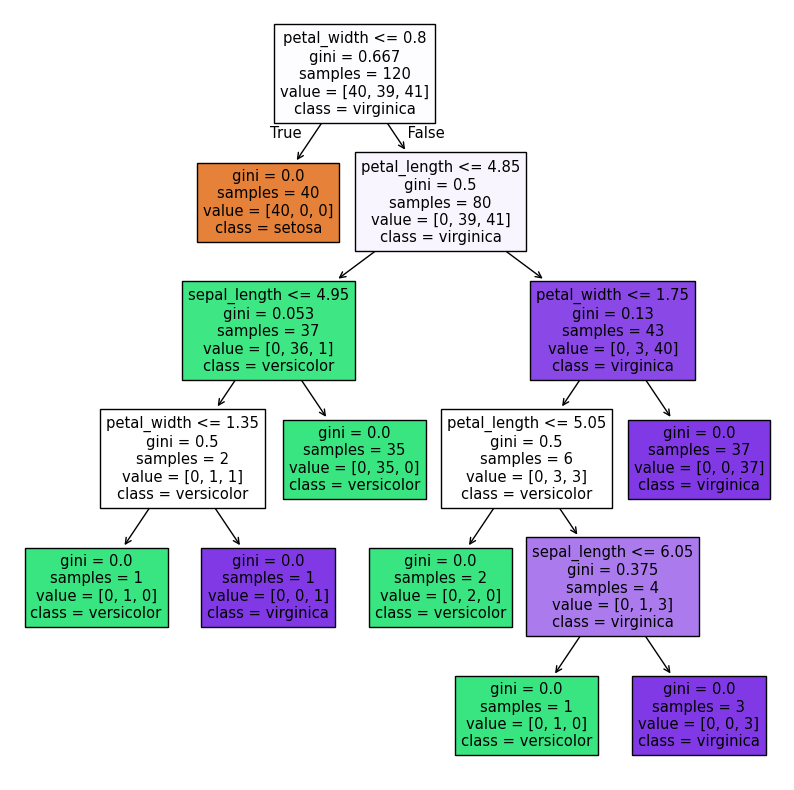

In [58]:
plt.figure(figsize =(10, 10) )
plot_tree(tree, feature_names = x.columns, class_names= y.unique(), filled = True)

plt.show()

In [59]:
yprediction = tree.predict(xtest)
print(yprediction)

['versicolor' 'setosa' 'virginica' 'versicolor' 'versicolor' 'versicolor'
 'virginica' 'setosa' 'setosa' 'virginica' 'virginica' 'setosa' 'setosa'
 'setosa' 'virginica' 'versicolor' 'versicolor' 'virginica' 'versicolor'
 'versicolor' 'versicolor' 'versicolor' 'setosa' 'versicolor' 'versicolor'
 'versicolor' 'setosa' 'setosa' 'versicolor' 'setosa']


In [60]:
acc = accuracy_score(ytest, yprediction)
print(f'{acc:.2%}')

90.00%


In [61]:
# Diabetes data
df = pd.read_csv('Diabetes.csv')
df.head()

,Pragnency,Glucose,Blod Pressure,Skin Thikness,Insulin,BMI,DFP,Age,Diabetes
0,1,85,66,29,0,26.6,0.351,31,0
1,8,183,64,0,0,23.3,0.672,32,1
2,1,89,66,23,94,28.1,0.167,21,0
3,0,137,40,35,168,43.1,2.288,33,1
4,5,116,74,0,0,25.6,0.201,30,0


In [62]:
x = df[['Glucose', 'Age']]
y = df['Diabetes']


In [63]:
xtrain, xtest, ytrain, ytest = train_test_split(x,y, test_size= 0.2 ,  random_state = 5)

In [64]:
# Model fitting
tree = DecisionTreeClassifier()
tree.fit(xtrain, ytrain)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [65]:
ypred = tree.predict(xtest)

In [66]:
acc = accuracy_score(ytest, ypred)
print(f'{acc:.2%}')

67.53%


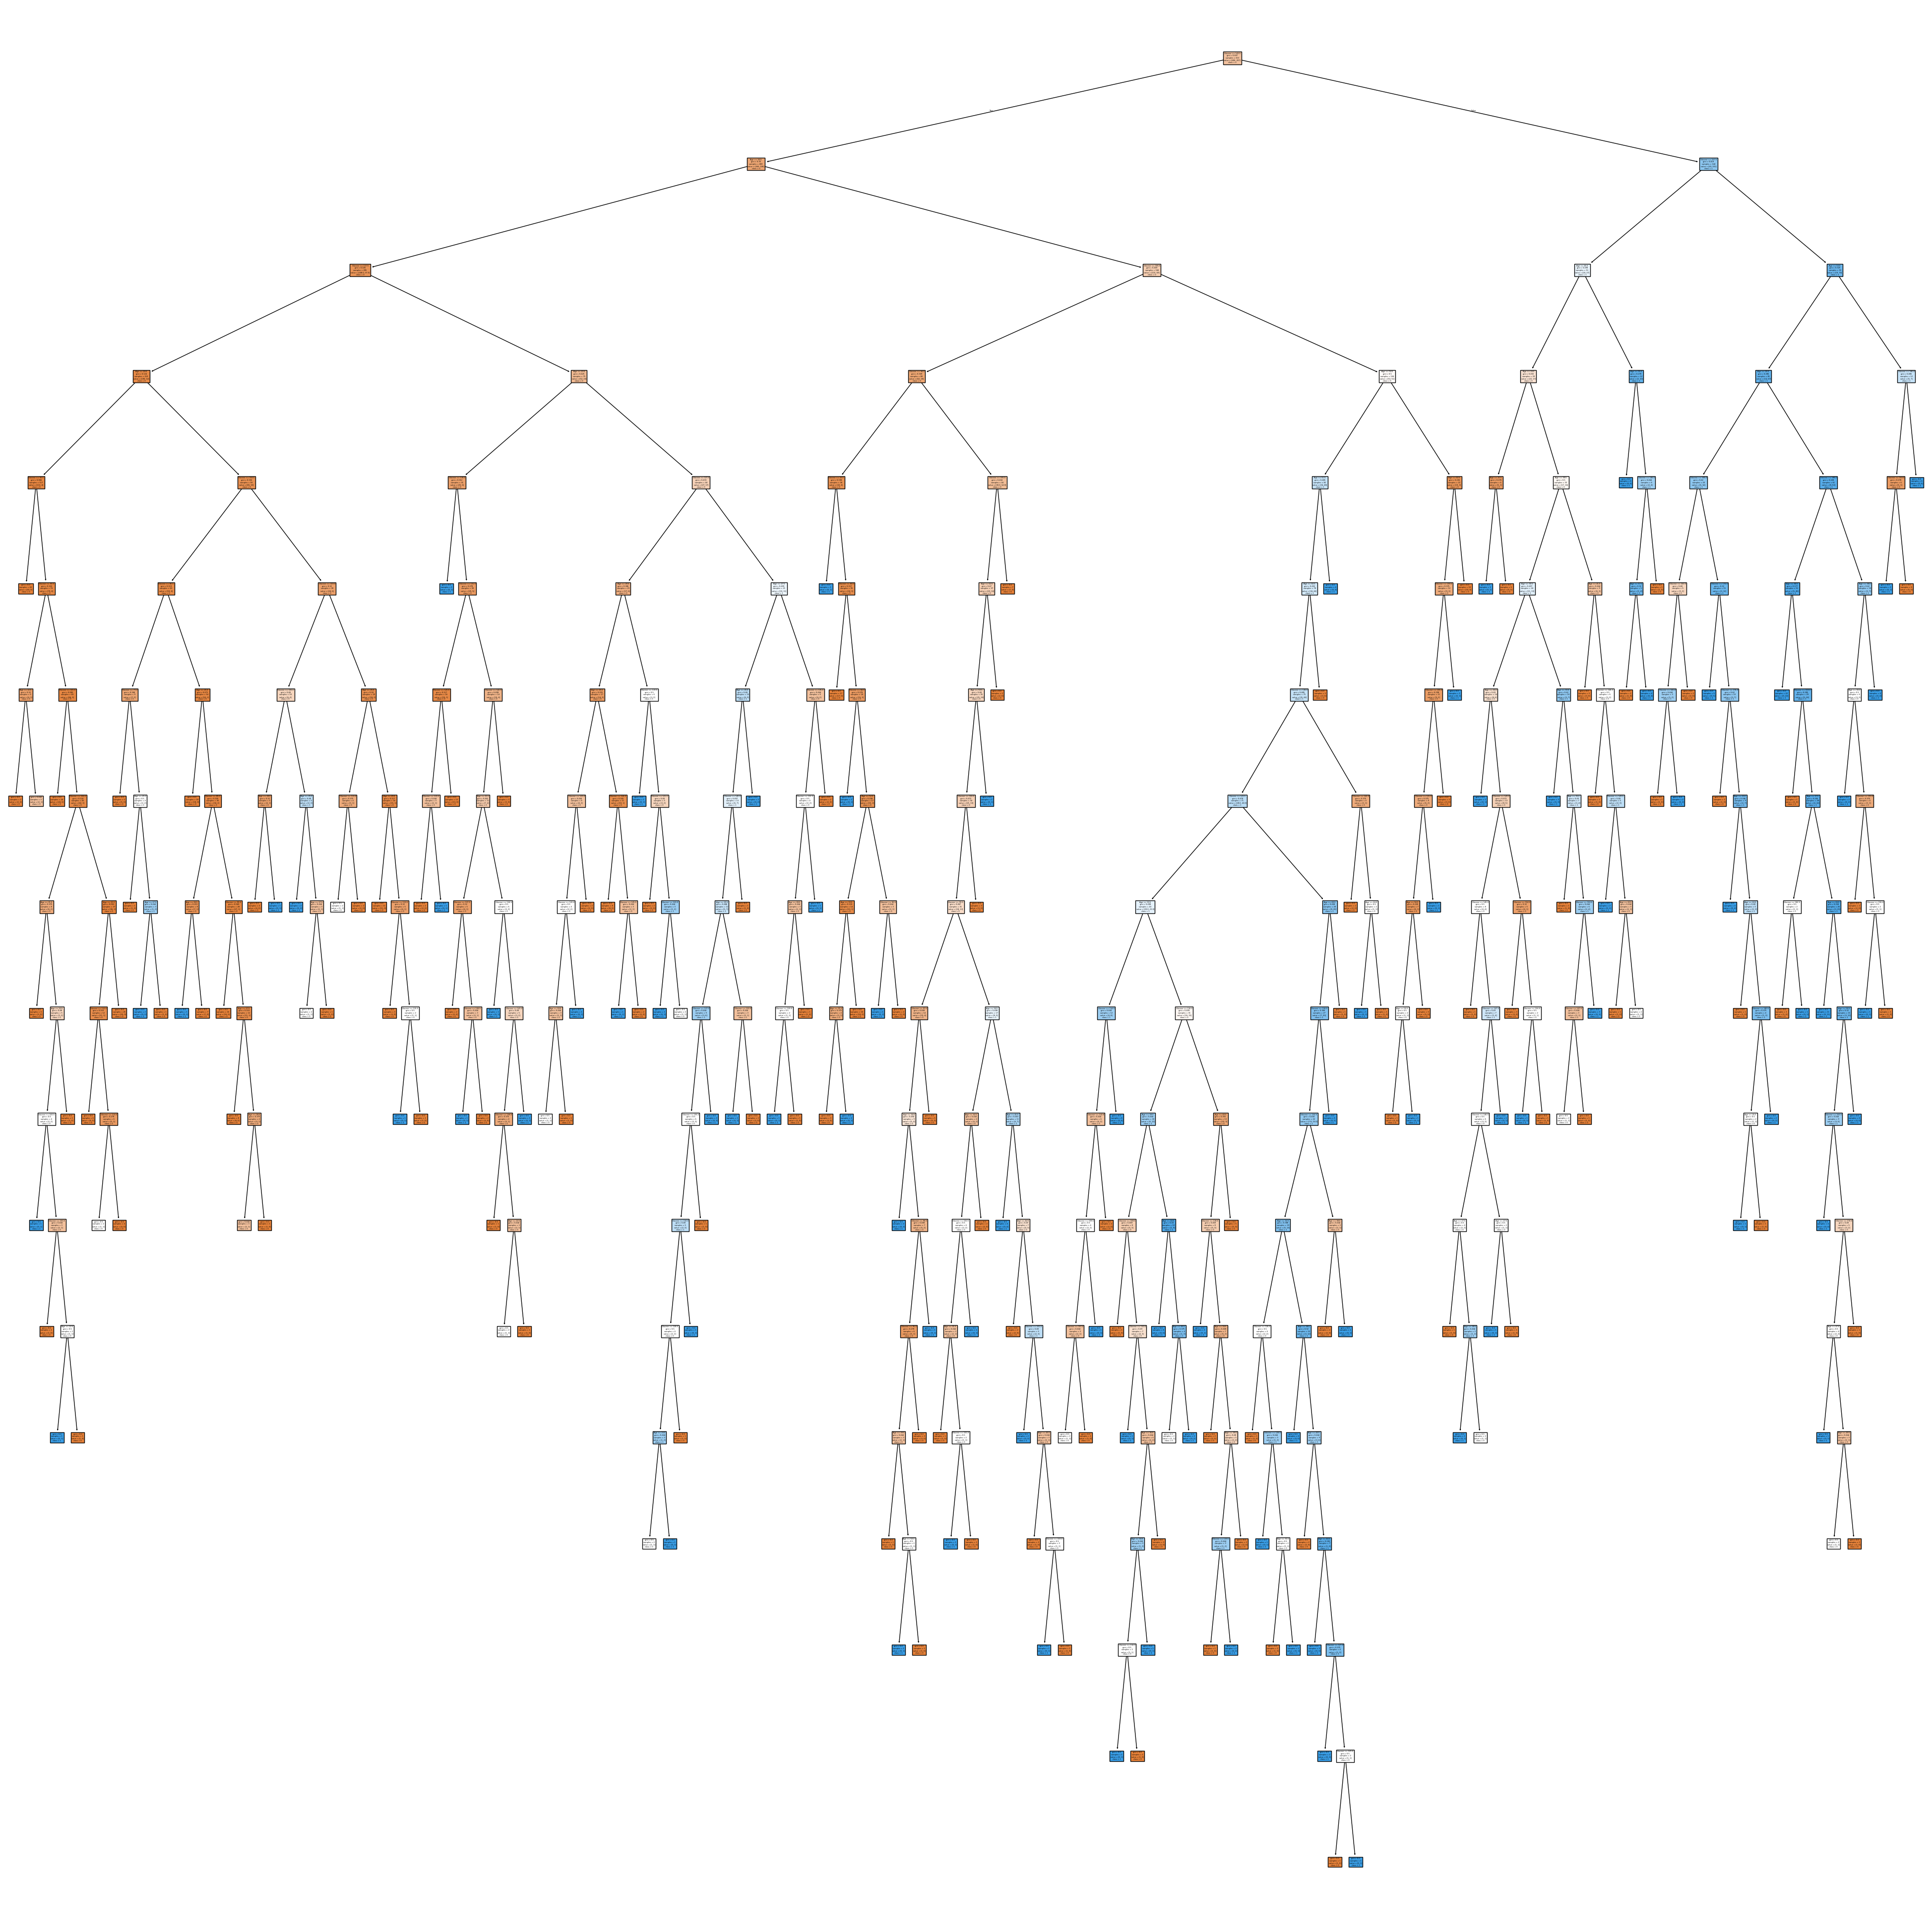

In [67]:
plt.figure(figsize=(50,50))
plot_tree(tree, feature_names= x.columns, class_names = y.unique().astype(str), filled = True )
plt.show()

In [68]:
# Over fitting
-xtrain, ytrain lai badi focus garyo 
- didnt made the logic instead memorized outcome of xtrain and ytrain making every output different leaves
- high trainning accuracy, low testing accuracy
# finding training accuracy



SyntaxError: invalid syntax (2410331908.py, line 2)

In [ ]:
ypred_train = tree.predict(xtrain)

In [ ]:
# Training accuracy
acc = accuracy_score(ytrain, ypred_train)
print(f'{acc:.2%}')

In [ ]:
High accuracy while predicting training values means the model is overfitted and has given more priority to training data than needed

In [ ]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split

In [ ]:
df = pd.read_csv('Diabetes.csv')
df.head()

In [ ]:
x = df[['Age', 'Glucose']]
y = df.Diabetes

In [ ]:
xtrain, xtest, ytrain, ytest = train_test_split(x,y, test_size = 0.2, random_state= 15)

In [ ]:
tree = DecisionTreeClassifier(max_depth = 5)
tree.fit(xtrain, ytrain)

In [ ]:
ypred = tree.predict(xtest)

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
acc = accuracy_score(ypred, ytest)
print(f'{acc:.2%}')

In [ ]:
# Cross Validation
from sklearn.model_selection import cross_val_score

In [ ]:
score = cross_val_score(tree, x , y, cv= 5)

In [ ]:
score

In [ ]:
score.mean()

In [ ]:

plot_tree(tree , feature_names= x.columns , class_names = y.unique().astype(str), filled=True)
plt.show()

In [ ]:
# Gridsearch
from sklearn.model_selection import GridSearchCV

In [ ]:
help(GridSearchCV)

In [ ]:
parameter = {
    'max_depth' : [5, 6, 7, None],
    'min_samples_split' : [10,15, 20, 2],
    
    
}

In [ ]:
model = GridSearchCV(estimator = DecisionTreeClassifier() , param_grid = parameter , scoring = 'accuracy', cv = 5 )

In [ ]:
model.fit(xtrain, ytrain)

In [ ]:
acc = model.score(xtest, ytest)
print(f'{acc:.2%}')

In [ ]:
model.best_params_

In [69]:
#Naive Bayes
    - used for classification
    -

IndentationError: unexpected indent (166213381.py, line 2)

In [70]:
import pandas as pd


In [71]:
df = pd.read_csv('Diabetes.csv')
df.head()

,Pragnency,Glucose,Blod Pressure,Skin Thikness,Insulin,BMI,DFP,Age,Diabetes
0,1,85,66,29,0,26.6,0.351,31,0
1,8,183,64,0,0,23.3,0.672,32,1
2,1,89,66,23,94,28.1,0.167,21,0
3,0,137,40,35,168,43.1,2.288,33,1
4,5,116,74,0,0,25.6,0.201,30,0


In [72]:
from sklearn.model_selection import train_test_split

In [73]:
x = df[['Age', 'Glucose']]
y = df.Diabetes

In [74]:
xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size = 0.2, random_state = 5)

In [75]:
from sklearn.naive_bayes import GaussianNB

In [76]:
model = GaussianNB()
model.fit(xtrain, ytrain)

,priors,None
,var_smoothing,1e-09


In [77]:
from sklearn.metrics import accuracy_score

In [78]:
ypred = model.predict(xtest)

In [79]:
accuracy = accuracy_score(ypred, ytest)
print(f'{accuracy:.2%}')

75.32%


In [80]:
from sklearn.model_selection import cross_val_score


In [81]:
score = cross_val_score(model , x ,y)

In [82]:
score.mean()

np.float64(0.7432391138273491)

In [83]:
score

array([0.73376623, 0.68831169, 0.75816993, 0.75163399, 0.78431373])

In [84]:
################################

In [85]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
df = pd.read_csv('Diabetes.csv')
df.head()

,Pragnency,Glucose,Blod Pressure,Skin Thikness,Insulin,BMI,DFP,Age,Diabetes
0,1,85,66,29,0,26.6,0.351,31,0
1,8,183,64,0,0,23.3,0.672,32,1
2,1,89,66,23,94,28.1,0.167,21,0
3,0,137,40,35,168,43.1,2.288,33,1
4,5,116,74,0,0,25.6,0.201,30,0


In [86]:
x = df[['Glucose','Age']]
y = df.Diabetes

In [87]:
from sklearn.model_selection import train_test_split

In [88]:
xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size = 0.2)

In [89]:
# Model fitting
dmodel = DecisionTreeClassifier()
dmodel.fit(xtrain, ytrain)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [90]:
import joblib
joblib.dump(dmodel, 'Saved_Model.pkl')

['Saved_Model.pkl']

In [91]:
import joblib
dmodel_2 = joblib.load('Saved_Model.pkl')

In [92]:
dmodel_2.predict([[200,40]])

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1])

In [93]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor


In [94]:
Enoding

NameError: name 'Enoding' is not defined

In [95]:
df = pd.read_csv('Salary_Data.csv')
df.shape

(6704, 6)

In [96]:
df.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0


In [97]:
df.isnull().sum()

Age                    2
Gender                 2
Education Level        3
Job Title              2
Years of Experience    3
Salary                 5
dtype: int64

In [98]:
df.dropna(inplace = True)

In [99]:
df = df.rename(columns={
    'Education Level' : 'Education'
})

In [100]:
df['Education'].unique()

array(["Bachelor's", "Master's", 'PhD', "Bachelor's Degree",
       "Master's Degree", 'High School', 'phD'], dtype=object)

In [101]:
df['Education'] = df['Education'].replace({
   "Bachelor's Degree":"Bachelor's",
    "Master's Degree":"Master's",
    'phD':'PhD'
    
})

In [102]:
df['Education'].unique()

array(["Bachelor's", "Master's", 'PhD', 'High School'], dtype=object)

In [103]:
df['Education'] = df['Education'].map({
    'High School':0,
    "Bachelor's":1,
    "Master's":2,
    'PhD':3
    
})

In [104]:
df.head()

,Age,Gender,Education,Job Title,Years of Experience,Salary
0,32.0,Male,1,Software Engineer,5.0,90000.0
1,28.0,Female,2,Data Analyst,3.0,65000.0
2,45.0,Male,3,Senior Manager,15.0,150000.0
3,36.0,Female,1,Sales Associate,7.0,60000.0
4,52.0,Male,2,Director,20.0,200000.0


In [105]:
df['Education'].unique()

array([1, 2, 3, 0])

In [106]:
df['Gender'].unique()

array(['Male', 'Female', 'Other'], dtype=object)

In [107]:
# Nominal : One hot Encoding
df['Gender'].unique()

array(['Male', 'Female', 'Other'], dtype=object)

In [108]:
# pd.get_dummies()
dfn = pd.get_dummies(df, columns=['Gender'],  dtype = int, drop_first = True)

In [109]:
dfn.head()

,Age,Education,Job Title,Years of Experience,Salary,Gender_Male,Gender_Other
0,32.0,1,Software Engineer,5.0,90000.0,1,0
1,28.0,2,Data Analyst,3.0,65000.0,0,0
2,45.0,3,Senior Manager,15.0,150000.0,1,0
3,36.0,1,Sales Associate,7.0,60000.0,0,0
4,52.0,2,Director,20.0,200000.0,1,0


In [110]:
x = dfn[['Age','Education', 'Gender_Male','Gender_Other']]
y = dfn.Salary

In [111]:
xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size=0.2)

In [112]:
from sklearn.linear_model import LinearRegression

In [113]:
#Model Fitting
lr = LinearRegression()
lr.fit(xtrain,ytrain)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [119]:
ypre  = lr.predict(xtest)

In [122]:
from sklearn.metrics import mean_absolute_percentage_error

In [124]:
mape =  mean_absolute_percentage_error(ytest, ypre)
print(f'{mape:.2%}')

29.14%


In [ ]:
print(f'{acc:.2%}')